In [2]:
# plot_morningness_latitude_cline.ipynb
"""""""""""""""""""""""""""""""""
# Author: Keila Velazquez-Arcelay
# 
# Description: Evaluate morningness associated variants that follow an allele frequency latitudinal cline in Eurasia.
#              Putilov introgressed rs75804782, T>C 2:238407402 (GRCh38) 2:239316043 (GRCh37).
#              GWAS: https://www.ebi.ac.uk/gwas/efotraits/EFO_0004354
#              Identified in introgression maps: Browning 2018, Sankararaman 2014, Steinruecken, Skov 2020
#              Mentioned in:
#              - Dannemann and Kelso, 2017. https://doi.org/10.1016/j.ajhg.2017.09.010
#              - Jones et al., 2016. https://doi.org/10.1371/journal.pgen.1006125
#              - Putilov et al., 2018. https://doi.org/10.1080/09291016.2018.1465249
#              
#              https://popgen.uchicago.edu/ggv
# 
"""""""""""""""""""""""""""""""""



# INPUT DATA
filenames = {
    'browning2018':'../data/plotting_morningness_latitude_cline_browning2018_chr2.bed',
    'browning2018_c':'../data/plotting_morningness_latitude_cline_browning2018_c_chr2.bed',
    'browning2018_plus1':'../data/plotting_morningness_latitude_cline_browning2018_plus1_chr2.bed',
    'browning2018_plus1_c':'../data/plotting_morningness_latitude_cline_browning2018_plus1_c_chr2.bed',
    'browning2018_plusAll':'../data/plotting_morningness_latitude_cline_browning2018_plusAll_chr2.bed',
    'browning2018_plusAll_c':'../data/plotting_morningness_latitude_cline_browning2018_plusAll_c_chr2.bed'
}


import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [78]:
def linear_regression(df, R, P, lr, plot):
    # Number of SNPs meeting the P-value and R threshold
    c = 0
    # Iterate SNPs by chromosome name and position
    for a,b in list(set(zip(df['Chr'],df['End']))):
        snp = df[(df['Chr']==a) & (df['End']==b)]
        rsid = snp['RSID'].drop_duplicates().values[0]
        if set(snp['ALT_FREQ'].values.tolist())!={0}:
            # Find association between the population's latitude and allele frequencies
            slope, intercept, r_value, p_value, std_err = stats.linregress(snp['Latitude'], 
                                                                snp['ALT_FREQ'])
            # Filter result by R and P-value
            if (r_value >= R or r_value <= -R) and (p_value <= P):
                c+=1
                # Return statistic values if specifiedby 'lr'
                if lr.upper()=='YES':
                    print('---\n{}: R:{}, P:{}, Std_err:{}\n'.format(rsid, round(r_value, 2), p_value, round(std_err, 6)))
                    label = '{}, {}:{}'.format(rsid, snp['Chr'].iloc[0], snp['End'].iloc[0])
                    # Return plot if specified by 'plot'
                    if plot.upper()=='YES':
                        x = snp['ALT_FREQ']
                        y = snp['Latitude']
                        m, b = np.polyfit(x, y, 1)
                        
                        # plt.scatter(x, y);
                        plt.plot(x, y, 'o', color='red')
                        plt.plot(x, m*x+b, color='black')
                        plt.title(label)
                        plt.xlabel('Frq')
                        plt.ylabel('Lat')
                        plt.show()
                    else:
                        print(label)
    df_len = len(df['RSID'].drop_duplicates())
    return f'There are {c} out of {df_len} morningness increasing variants showing a latitudinal cline pattern with R>={R}'




In [79]:
# LOAD DATA
#morningness = pd.read_csv(ALLELE_LAT, sep='\t')
dfs = {}
for k,v in filenames.items():
    dfs[k] = pd.read_csv(v, sep='\t')
    dfs[k].rename(columns={'lat_ancestry':'Latitude'}, inplace=True)



In [86]:
# Number of circadian introgressed SNPs associated with chronotype (pval<=5x10^-8)
print('Introgressed SNPs associated with chronotype (pval<=5x10^-8):\n\
      Browning et al., 2018: {}\n\
      Circadian Browning et al., 2018: {}\n\
      Browning +1 other methods: {}\n\
      Circadian Browning +1 other methods: {}'.format(
    len(dfs['browning2018']['RSID'].drop_duplicates()),
    len(dfs['browning2018_c']['RSID'].drop_duplicates()),
    len(dfs['browning2018_plus1']['RSID'].drop_duplicates()),
    len(dfs['browning2018_plus1_c']['RSID'].drop_duplicates())
))


Introgressed SNPs associated with chronotype (pval<=5x10^-8):
      Browning et al., 2018: 1075
      Circadian Browning et al., 2018: 39
      Browning +1 other methods: 899
      Circadian Browning +1 other methods: 38


In [103]:
# Test the introgressed morningness SNPs for latitudinal clines in Eurasia
# (DATAFRAME, R, PVALUE, STATISTICS OUTPUT, PLOT OUTPUT)
linear_regression(dfs['browning2018_plus1'], 0.65, 0.05, 'no', 'no')


'There are 369 out of 899 morningness increasing variants showing a latitudinal cline pattern with R>=0.65'

---
rs75804782: R:0.85, P:6.0477558340006774e-05, Std_err:0.043658



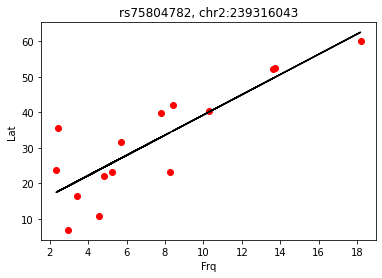

'There are 1 out of 1 morningness increasing variants showing a latitudinal cline pattern with R>=0.75'

In [112]:
# Previously reported circadian introgressed SNPs that follows a latitudinal cline in Eurasia
# Putilov introgressed variant: rs75804782
putilov = dfs['browning2018_plus1'][(dfs['browning2018_plus1']['Chr']=='chr2') & (dfs['browning2018_plus1']['End']==239316043)]
linear_regression(putilov, 0.75, 0.05, 'yes', 'yes')


In [89]:
stats.pearsonr(putilov['ALT_FREQ'], putilov['Latitude'])

(0.84978873219386, 6.047755834000703e-05)

In [ ]:
# LD signals

In [3]:
r = pd.read_csv('../data/chronotype_chr2_r2.tsv', sep='\t', index_col=0)

In [111]:
r.reset_index(inplace=True) #r.reset_index(names='RSID', inplace=True)
r.rename(columns={r.columns[0]: 'RSID'}, inplace=True)


In [113]:
data = pd.merge(dfs['browning2018_plus1'].iloc[:,:4].drop_duplicates(),r, on='RSID')


In [ ]:
# GTEx

In [91]:
gtex = pd.read_csv('../data/raw_GTEx_v8_browning2018.bed.xz', sep='\t', compression='xz')

In [ ]:
#gtex = gtex.rename(columns={gtex.columns[0]: 'Chr', gtex.columns[1]: 'Start', gtex.columns[2]: 'End'})


In [95]:
morningness_eqtl = pd.merge(gtex,dfs['browning2018_plus1'],on=['Chr','Start','End'])#[['Chr','Start','End','gene_id','eQTL','RSID']].drop_duplicates()

In [99]:
#morningness_eqtl[morningness_eqtl['GeneID'].str.startswith('ENSG00000144485')]
morningness_eqtl[morningness_eqtl['ID']=='rs75804782']['GeneID'].drop_duplicates()

52095    ENSG00000186235
52110    ENSG00000204104
52155    ENSG00000065802
Name: GeneID, dtype: object

In [94]:
morningness_eqtl

,Chr,Start,End,ID,Ref/Alt,GeneID,pval_nominal,pval_beta,Tissue,RSID,beta,pval,Haplotype,Population,reg,Latitude,REF_FREQ,ALT_FREQ
0,chr2,539703,539704,rs146650757,T/A,ENSG00000235688,0.000057,2.095530e-13,Adipose_Subcutaneous,rs146650757,0.026593,0.037109,206,CDX,EAS,22.000000,100.00,0.00
1,chr2,539703,539704,rs146650757,T/A,ENSG00000235688,0.000057,2.095530e-13,Adipose_Subcutaneous,rs146650757,0.026593,0.037109,206,CHB,EAS,39.916666,100.00,0.00
2,chr2,539703,539704,rs146650757,T/A,ENSG00000235688,0.000057,2.095530e-13,Adipose_Subcutaneous,rs146650757,0.026593,0.037109,206,JPT,EAS,35.680000,100.00,0.00
3,chr2,539703,539704,rs146650757,T/A,ENSG00000235688,0.000057,2.095530e-13,Adipose_Subcutaneous,rs146650757,0.026593,0.037109,206,KHV,EAS,10.780000,100.00,0.00
4,chr2,539703,539704,rs146650757,T/A,ENSG00000235688,0.000057,2.095530e-13,Adipose_Subcutaneous,rs146650757,0.026593,0.037109,206,CHS,EAS,23.133330,100.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62380,chr2,242789902,242789903,rs200317777,T/C,ENSG00000216921,0.000038,1.104490e-03,Adipose_Visceral_Omentum,rs200317777,-0.023908,0.031731,417,GBR,EUR,52.486243,99.45,0.55
62381,chr2,242789902,242789903,rs200317777,T/C,ENSG00000216921,0.000038,1.104490e-03,Adipose_Visceral_Omentum,rs200317777,-0.023908,0.031731,417,FIN,EUR,60.170000,96.46,3.54
62382,chr2,242789902,242789903,rs200317777,T/C,ENSG00000216921,0.000038,1.104490e-03,Adipose_Visceral_Omentum,rs200317777,-0.023908,0.031731,417,IBS,EUR,40.380000,98.60,1.40
62383,chr2,242789902,242789903,rs200317777,T/C,ENSG00000216921,0.000038,1.104490e-03,Adipose_Visceral_Omentum,rs200317777,-0.023908,0.031731,417,TSI,EUR,42.100000,99.53,0.47
